In [1]:
import cv2
import numpy as np  # PythonのOpenCVでは、画像はnumpyのarrayとして管理される
from google.colab.patches import cv2_imshow # colab内で画像表示関数がうまく動かないので、パッチが提供されている

# Googleドライブへのマウント
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/三年後期　火3/課題1"

Mounted at /content/drive
/content/drive/My Drive/三年後期　火3/課題1


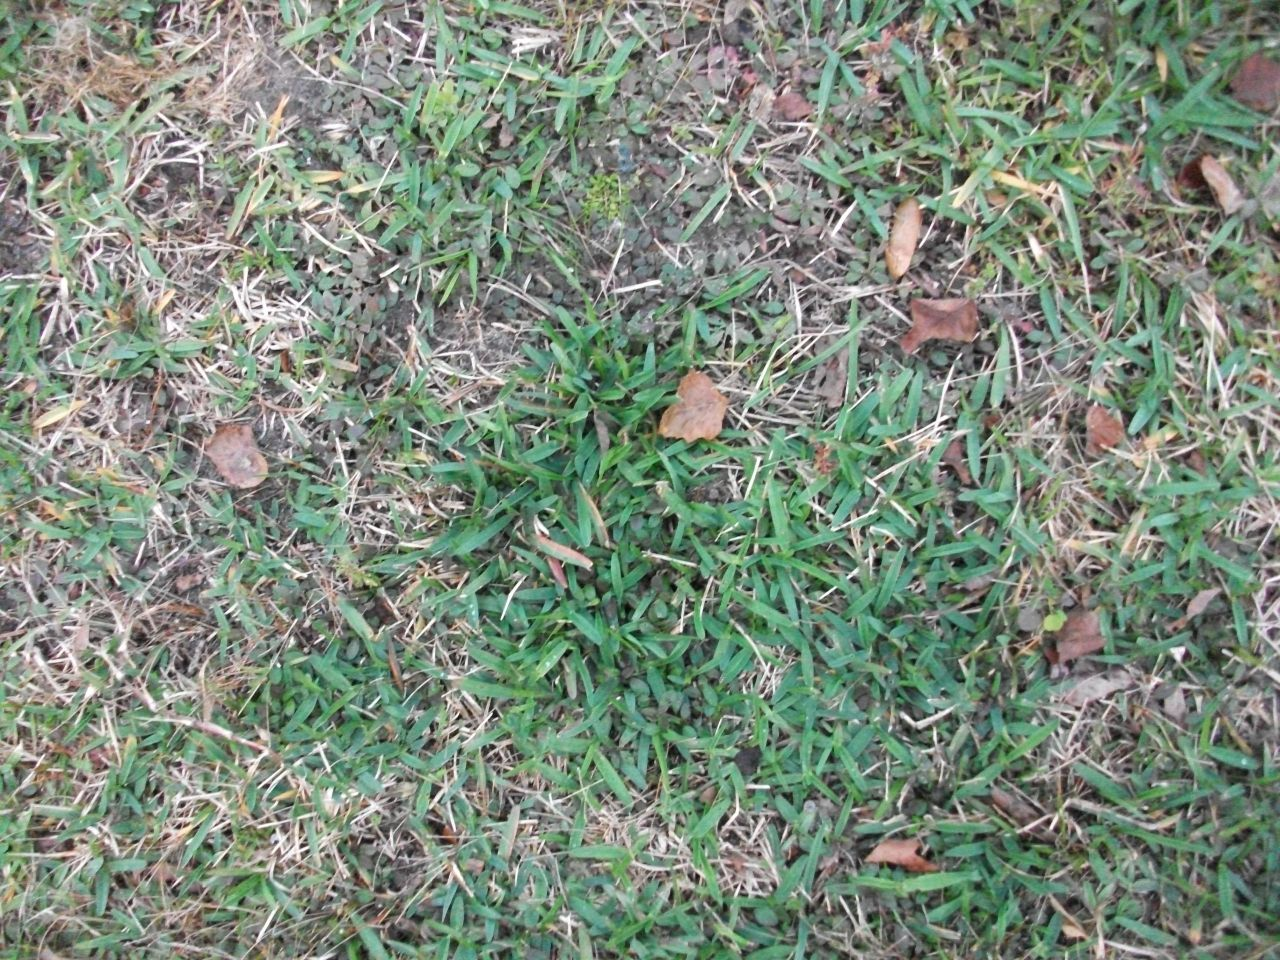

In [2]:
# 画像の読み込み
img = cv2.imread("field.jpg")
cv2_imshow(img)

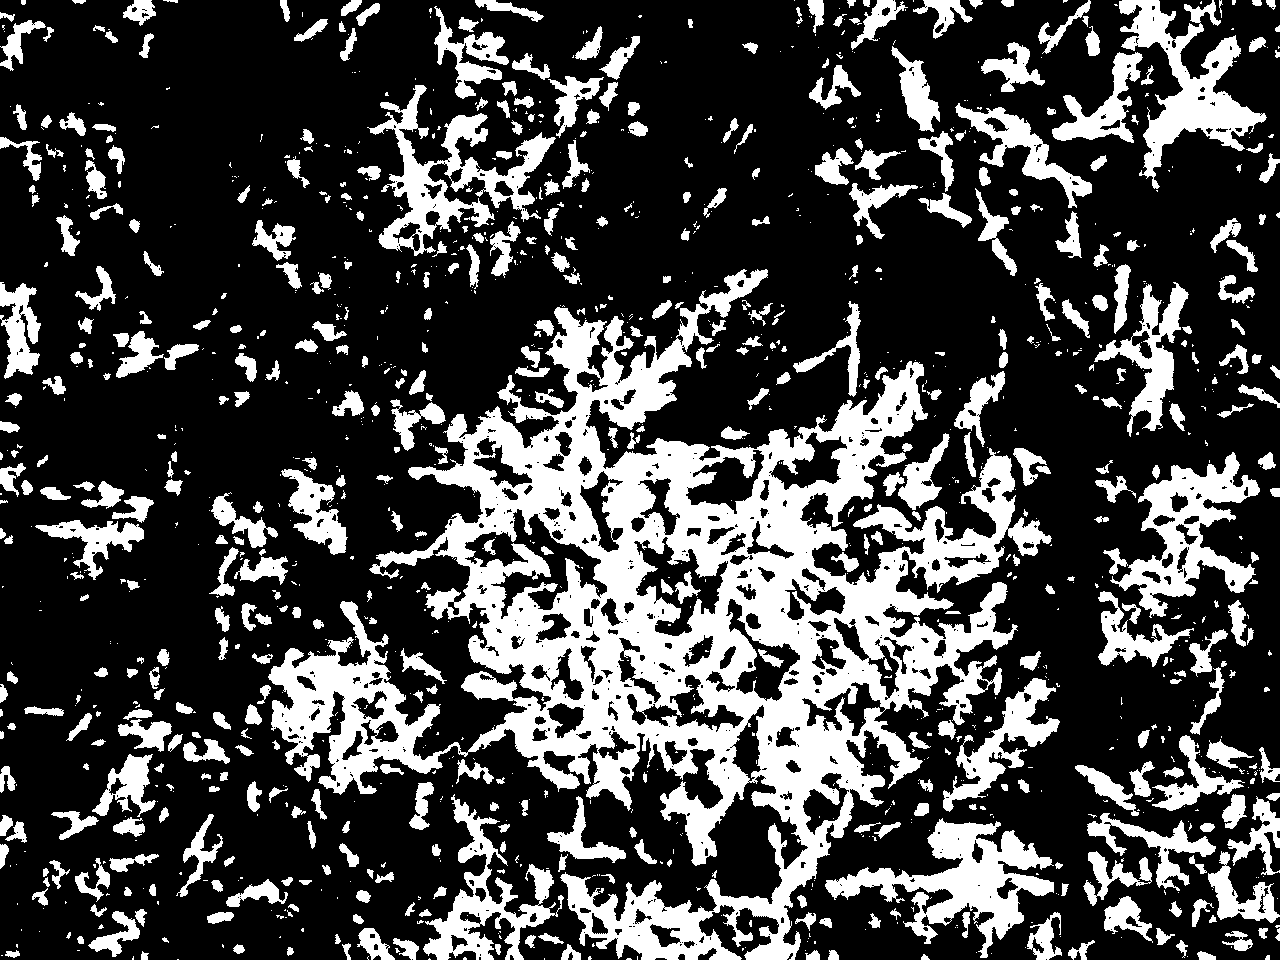

True

In [3]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # HSV色空間へ変換

# Hチャンネル（色相）を抽出
hue_channel = img_hsv[:, :, 0]

# ヒストグラムを計算（色相の範囲は0～180）
hist = cv2.calcHist([hue_channel], [0], None, [180], [0, 180])

# ヒストグラムの正規化（必要に応じて）
hist = cv2.normalize(hist, hist).flatten()

# 緑色の範囲（おおよそH = 35-85の範囲が緑）
green_lower_bound = 35
green_upper_bound = 85

# 緑色のピークを見つける（最大値のインデックスを探す）
green_peak_index = np.argmax(hist[green_lower_bound:green_upper_bound]) + green_lower_bound

# ピークに基づいて最適な緑色範囲を設定
optimal_lower_bound = max(green_peak_index - 10, 0)  # ピークから10度下
optimal_upper_bound = min(green_peak_index + 10, 179)  # ピークから10度上

# 最適化された緑色の範囲
lower_green = np.array([optimal_lower_bound, 40, 40])  # SとVの値は調整可能
upper_green = np.array([optimal_upper_bound, 255, 255])

# 緑色の部分をマスクとして抽出
mask = cv2.inRange(img_hsv, lower_green, upper_green)

# 出力画像を生成（雑草部分を白、その他を黒）
output = cv2.bitwise_and(img, img, mask=mask)  # 雑草の部分のみ抽出
output[mask > 0] = [255, 255, 255]  # 雑草の部分を白に
output[mask == 0] = [0, 0, 0]  # その他の部分を黒に

cv2_imshow(mask)
cv2.imwrite("output.png", mask)